<a href="https://colab.research.google.com/github/Seife1/Financial-Analysis-of-Stocks-from-Financial-News/blob/task-3/notebooks/Correlation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Correlation between daily news sentiment scores and stock returns**

## **Data Overview**

Financial News and Stock Price Integration Dataset
FNSPID (Financial News and Stock Price Integration Dataset), is a comprehensive financial dataset designed to enhance stock market predictions by combining quantitative and qualitative data.

## **Imports and Reading Data**

In [ ]:
# Import Essentials Library
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno # missing patterns


In [ ]:
# Warning
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Stock prices datasets**

In [ ]:
AAPL = pd.read_csv('/content/drive/MyDrive/Classroom/KifiyaAIM/Technical  Content/Data/yfinance_data/AAPL_historical_data.csv')
AMZN = pd.read_csv('/content/drive/MyDrive/Classroom/KifiyaAIM/Technical  Content/Data/yfinance_data/AMZN_historical_data.csv')
GOOG = pd.read_csv('/content/drive/MyDrive/Classroom/KifiyaAIM/Technical  Content/Data/yfinance_data/GOOG_historical_data.csv')
META = pd.read_csv('/content/drive/MyDrive/Classroom/KifiyaAIM/Technical  Content/Data/yfinance_data/META_historical_data.csv')
MSFT = pd.read_csv('/content/drive/MyDrive/Classroom/KifiyaAIM/Technical  Content/Data/yfinance_data/MSFT_historical_data.csv')
NVDA = pd.read_csv('/content/drive/MyDrive/Classroom/KifiyaAIM/Technical  Content/Data/yfinance_data/NVDA_historical_data.csv')
TSLA = pd.read_csv('/content/drive/MyDrive/Classroom/KifiyaAIM/Technical  Content/Data/yfinance_data/TSLA_historical_data.csv')

Our next focus will be on understanding, exploring, and analyzing this dataset.

### **Data Understanding**

In [ ]:
# Now I would like to concatenate all the DataFrames into one after adding the 'stock' column to each DataFrame
stocks = [AAPL, MSFT, NVDA, TSLA, META, GOOG, AMZN]

# Add the 'stock' column to each DataFrame
for i, stock in enumerate(stocks):
  stock['Stock'] = ['AAPL', 'MSFT', 'NVDA', 'TSLA', 'META', 'GOOG', 'AMZN'][i] # Assign the corresponding stock ticker as the value

data_frame = pd.concat(stocks, ignore_index=True)
data_frame.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Stock
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,AAPL
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0,AAPL
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0,AAPL
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0,AAPL
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0,AAPL


In [ ]:
data_frame.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Stock
45423,2024-07-24,183.199997,185.449997,180.410004,180.830002,180.830002,41532400,0.0,0.0,AMZN
45424,2024-07-25,182.910004,183.899994,176.800003,179.850006,179.850006,44464200,0.0,0.0,AMZN
45425,2024-07-26,180.389999,183.190002,180.240005,182.500000,182.500000,29506000,0.0,0.0,AMZN
45426,2024-07-29,183.839996,184.750000,182.380005,183.199997,183.199997,33270100,0.0,0.0,AMZN
45427,2024-07-30,184.720001,185.860001,179.380005,181.710007,181.710007,39508600,0.0,0.0,AMZN


In [ ]:
# Shape the combined DataFrame
print(f'Datasets shape: {data_frame.shape}')

Datasets shape: (45428, 10)


In [ ]:
# Data info
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45428 entries, 0 to 45427
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          45428 non-null  object 
 1   Open          45428 non-null  float64
 2   High          45428 non-null  float64
 3   Low           45428 non-null  float64
 4   Close         45428 non-null  float64
 5   Adj Close     45428 non-null  float64
 6   Volume        45428 non-null  int64  
 7   Dividends     45428 non-null  float64
 8   Stock Splits  45428 non-null  float64
 9   Stock         45428 non-null  object 
dtypes: float64(7), int64(1), object(2)
memory usage: 3.5+ MB


In [ ]:
data_frame.dtypes.value_counts()

,count
float64,7
object,2
int64,1


In [ ]:
# To ensures that the Date column is recognized as a date,
# I must convert the Date column from an object (string) to a datetime format
data_frame['Date'] = pd.to_datetime(data_frame['Date'])

# # Ensure 'Date' in data_frame remains in datetime format for alignment
data_frame['Date'] = pd.to_datetime(data_frame['Date']).dt.date

# Convert 'Date' back to datetime format
data_frame['Date'] = pd.to_datetime(data_frame['Date'])

In [ ]:
data_frame.dtypes.value_counts()

,count
float64,7
datetime64[ns],1
int64,1
object,1


In [ ]:
data_frame.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Stock
45423,2024-07-24,183.199997,185.449997,180.410004,180.830002,180.830002,41532400,0.0,0.0,AMZN
45424,2024-07-25,182.910004,183.899994,176.800003,179.850006,179.850006,44464200,0.0,0.0,AMZN
45425,2024-07-26,180.389999,183.190002,180.240005,182.500000,182.500000,29506000,0.0,0.0,AMZN
45426,2024-07-29,183.839996,184.750000,182.380005,183.199997,183.199997,33270100,0.0,0.0,AMZN
45427,2024-07-30,184.720001,185.860001,179.380005,181.710007,181.710007,39508600,0.0,0.0,AMZN


### **Data Preparation**

In [ ]:
# Checking for Duplicates columns
duplicated_columns = data_frame.columns[data_frame.columns.duplicated()]
if len(duplicated_columns) > 0:
    print(f"Duplicate columns found: {', '.join(duplicated_columns)}")
else:
    print("No duplicate columns found.")

No duplicate columns found.


In [ ]:
#rows
duplicated_rows = data_frame[data_frame.duplicated()]
if len(duplicated_rows) > 0:
    print(f"Duplicate rows found: {len(duplicated_rows)}")
else:
    print("No duplicate rows found.")

No duplicate rows found.


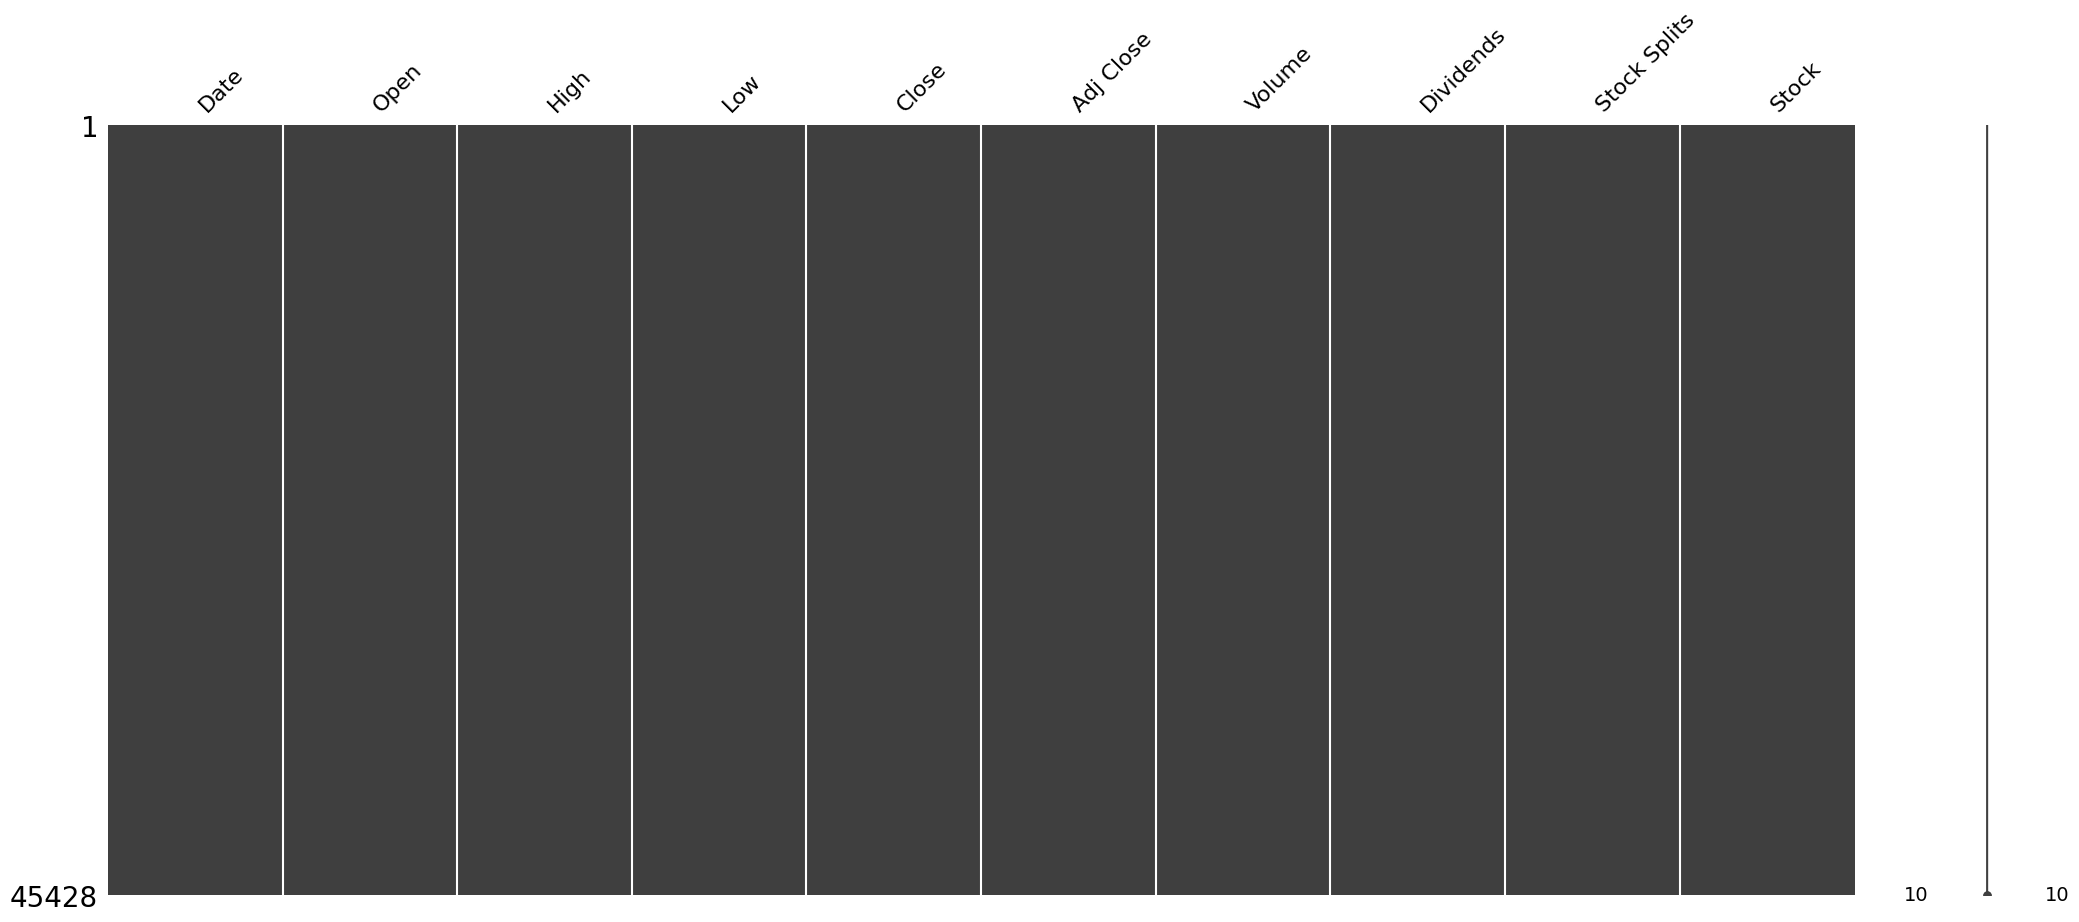

In [ ]:
# Checking for missing values by visualizing missing data patterns
msno.matrix(data_frame)
plt.show()

As we have seen from the vissualizer the DataFrame has no missing values.

### **Feature Understanding**

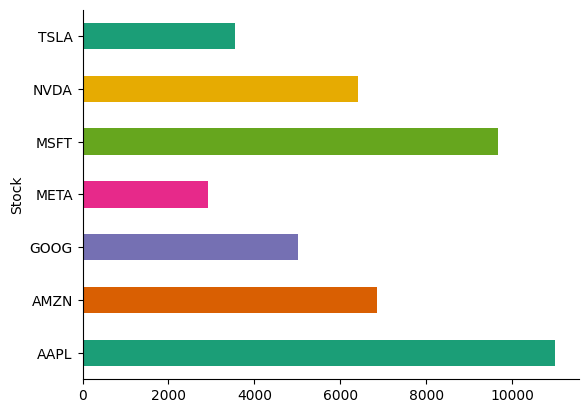

In [ ]:
data_frame.groupby('Stock').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

This distribution highlights the varying levels of trading activity or **historical data availability** across these major tech companies. And that Apple (AAPL) has the most extensive dataset, suggesting it has the highest number of records, possibly due to its long trading history or significant market activity, Meta (META) has the smallest dataset, which may be attributed to its later market presence or less frequent trading.

## **News Datasets**

### **Data Understanding**

In [ ]:
news_data_frame = pd.read_csv('/content/drive/MyDrive/Classroom/KifiyaAIM/Technical  Content/Data/raw_analyst_ratings.csv')

Our next focus will be on understanding, exploring, and analyzing this dataset.

In [ ]:
news_data_frame.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [ ]:
# Shape the combined DataFrame
print(f'Datasets shape: {news_data_frame.shape}')

Datasets shape: (1407328, 6)


In [ ]:
# Drop the first column (Unnamed: 0)
news_data_frame.drop('Unnamed: 0',axis=1,inplace=True)

# Rename all the columns of news_data_frame
news_data_frame.columns = ['Headline', 'URL', 'Publisher', 'Date', 'Stock']

# Print Info about the news_data_frame
news_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   Headline   1407328 non-null  object
 1   URL        1407328 non-null  object
 2   Publisher  1407328 non-null  object
 3   Date       1407328 non-null  object
 4   Stock      1407328 non-null  object
dtypes: object(5)
memory usage: 53.7+ MB


In [ ]:
news_data_frame.dtypes.value_counts()

,count
object,5


In [ ]:
# Convert the 'Date' Column to Datetime
news_data_frame['Date'] = pd.to_datetime(news_data_frame['Date'], errors='coerce')

In [ ]:
# Drop Rows Where the Conversion Failed
news_data_frame = news_data_frame.dropna(subset=['Date'])

In [ ]:
# Remove Time Zones and Extract Only the Date Part
news_data_frame['Date'] = news_data_frame['Date'].dt.tz_localize(None).dt.date


In [ ]:
# Convert Back to datetime64[ns] Type
news_data_frame['Date'] = pd.to_datetime(news_data_frame['Date'])


In [ ]:
news_data_frame.dtypes.value_counts()

,count
object,4
datetime64[ns],1


In [ ]:
news_data_frame.tail()

,Headline,URL,Publisher,Date,Stock
1407266,Chinese Nano-Cap Momentum Stocks Sharply Highe...,https://www.benzinga.com/movers/18/01/10994518...,Paul Quintaro,2018-01-05,ZX
1407267,28 Stocks Moving In Wednesday's Pre-Market Ses...,https://www.benzinga.com/news/17/12/10878295/2...,Lisa Levin,2017-12-06,ZX
1407268,China Zenix Auto International Reports Q3 EPAD...,https://www.benzinga.com/news/earnings/17/12/1...,Paul Quintaro,2017-12-06,ZX
1407269,46 Biggest Movers From Yesterday,https://www.benzinga.com/news/17/11/10788120/4...,Lisa Levin,2017-11-15,ZX
1407270,42 Stocks Moving In Tuesday's Mid-Day Session,https://www.benzinga.com/news/17/11/10782008/4...,Lisa Levin,2017-11-14,ZX


### **Data Preparation**

In [ ]:
# Checking for Duplicates columns
duplicated_columns = news_data_frame.columns[news_data_frame.columns.duplicated()]
if len(duplicated_columns) > 0:
    print(f"Duplicate columns found: {', '.join(duplicated_columns)}")
else:
    print("No duplicate columns found.")

No duplicate columns found.


In [ ]:
#rows
duplicated_rows = news_data_frame[news_data_frame.duplicated()]
if len(duplicated_rows) > 0:
    print(f"Duplicate rows found: {len(duplicated_rows)}")
else:
    print("No duplicate rows found.")

No duplicate rows found.


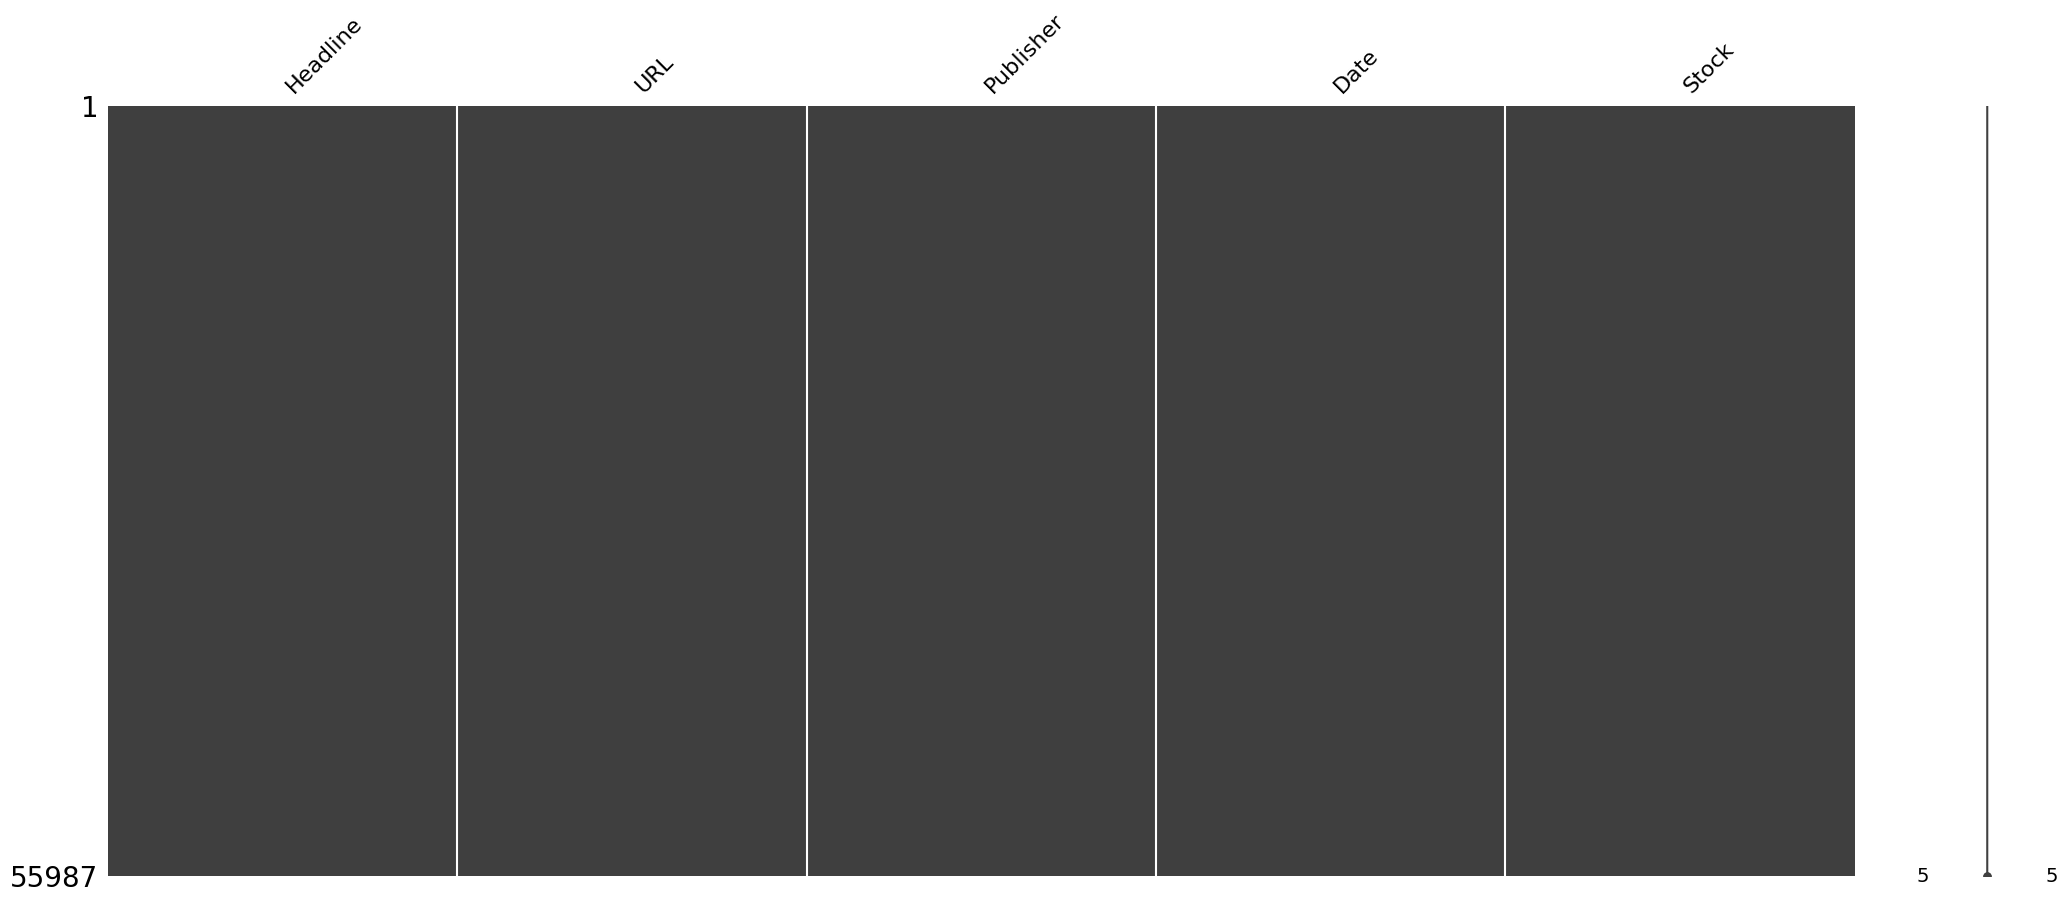

In [ ]:
# Checking for missing values by visualizing missing data patterns
msno.matrix(news_data_frame)
plt.show()

So I have prepared the data now it time to align both datasets based on time and Stock

In [ ]:
merged_df = pd.merge(news_data_frame, data_frame, on=['Date', 'Stock'], how='inner')

# Verify the merged data
merged_df.head()



,Headline,URL,Publisher,Date,Stock,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,Tech Stocks And FAANGS Strong Again To Start D...,https://www.benzinga.com/government/20/06/1622...,JJ Kinahan,2020-06-10,AAPL,86.974998,88.692497,86.522499,88.209999,86.047615,166651600,0.0,0.0
1,10 Biggest Price Target Changes For Wednesday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-06-10,AAPL,86.974998,88.692497,86.522499,88.209999,86.047615,166651600,0.0,0.0
2,"Benzinga Pro's Top 5 Stocks To Watch For Wed.,...",https://www.benzinga.com/short-sellers/20/06/1...,Benzinga Newsdesk,2020-06-10,AAPL,86.974998,88.692497,86.522499,88.209999,86.047615,166651600,0.0,0.0
3,"Deutsche Bank Maintains Buy on Apple, Raises P...",https://www.benzinga.com/news/20/06/16219873/d...,Benzinga Newsdesk,2020-06-10,AAPL,86.974998,88.692497,86.522499,88.209999,86.047615,166651600,0.0,0.0
4,Apple To Let Users Trade In Their Mac Computer...,https://www.benzinga.com/news/20/06/16218697/a...,Neer Varshney,2020-06-10,AAPL,86.974998,88.692497,86.522499,88.209999,86.047615,166651600,0.0,0.0


In [ ]:
merged_df.tail()

,Headline,URL,Publisher,Date,Stock,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
44,Tesla Shares Mark Session And New All-Time Hig...,https://www.benzinga.com/hot/20/06/16221958/te...,Benzinga Newsdesk,2020-06-10,TSLA,66.125336,68.498665,65.5,68.33667,68.33667,278451000,0.0,0.0
45,Wedbush Says Tesla Has 'Game Changing' Develop...,https://www.benzinga.com/analyst-ratings/analy...,Jayson Derrick,2020-06-10,TSLA,66.125336,68.498665,65.5,68.33667,68.33667,278451000,0.0,0.0
46,"Wedbush Maintains Neutral on Tesla, Raises Pri...",https://www.benzinga.com/news/20/06/16220834/w...,Benzinga Newsdesk,2020-06-10,TSLA,66.125336,68.498665,65.5,68.33667,68.33667,278451000,0.0,0.0
47,Musk Says It's Time To Ramp Production Of Tesl...,https://www.benzinga.com/news/20/06/16220141/m...,Tanzeel Akhtar,2020-06-10,TSLA,66.125336,68.498665,65.5,68.33667,68.33667,278451000,0.0,0.0
48,Tesla shares are trading higher after Wedbush ...,https://www.benzinga.com/wiim/20/06/16220126/t...,Benzinga Newsdesk,2020-06-10,TSLA,66.125336,68.498665,65.5,68.33667,68.33667,278451000,0.0,0.0


### **Sentiment Analysis on News Headlines**

In [ ]:
from textblob import TextBlob

# Define a function to calculate sentiment polarity
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply the sentiment analysis function to the news headlines
merged_df['Sentiment'] = merged_df['Headline'].apply(get_sentiment)

# Inspect the results
merged_df[['Date', 'Headline', 'Sentiment']].head()

,Date,Headline,Sentiment
0,2020-06-10,Tech Stocks And FAANGS Strong Again To Start D...,0.433333
1,2020-06-10,10 Biggest Price Target Changes For Wednesday,0.000000
2,2020-06-10,"Benzinga Pro's Top 5 Stocks To Watch For Wed.,...",0.500000
3,2020-06-10,"Deutsche Bank Maintains Buy on Apple, Raises P...",0.000000
4,2020-06-10,Apple To Let Users Trade In Their Mac Computer...,0.000000


### **Calculate Daily Stock Returns**

In [ ]:
# Calculate daily returns
merged_df['Daily_Return'] = merged_df['Close'].pct_change()

# Drop any rows with missing values (e.g., the first row after pct_change)
merged_df.dropna(subset=['Daily_Return'], inplace=True)

# Inspect the results
merged_df[['Date', 'Close', 'Daily_Return']].head(10)


,Date,Close,Daily_Return
1,2020-06-10,88.209999,0.000000
2,2020-06-10,88.209999,0.000000
3,2020-06-10,88.209999,0.000000
4,2020-06-10,88.209999,0.000000
5,2020-06-10,88.209999,0.000000
6,2020-06-09,85.997498,-0.025082
7,2020-06-09,85.997498,0.000000
8,2020-06-09,85.997498,0.000000
9,2020-06-09,85.997498,0.000000
10,2020-06-10,132.372498,0.539260


### **Correlation Analysis**

In [ ]:
# Perform correlation analysis
correlation = merged_df['Sentiment'].corr(merged_df['Daily_Return'])

# Print the correlation result
print(f'Correlation between news sentiment and daily stock returns: {correlation:.4f}')


Correlation between news sentiment and daily stock returns: 0.1004


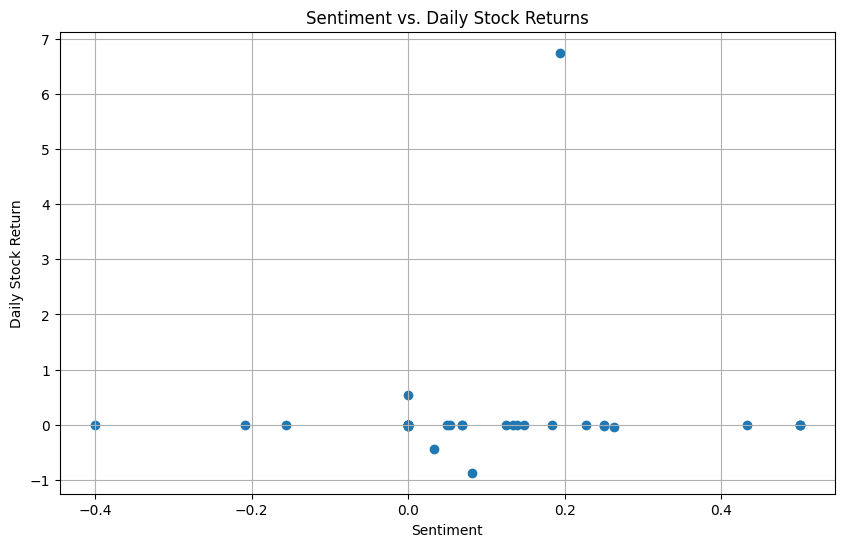

In [ ]:
# Scatter plot for sentiment vs. daily returns
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Sentiment'], merged_df['Daily_Return'])
plt.title('Sentiment vs. Daily Stock Returns')
plt.xlabel('Sentiment')
plt.ylabel('Daily Stock Return')
plt.grid(True)
plt.show()

The correlation value between news sentiment and daily stock returns, as indicated by analysis, is approximately 0.1004. This value is very close to zero, which suggests a **weak positive correlation** between the two variables.

This suggests that other factors are likely more influential in determining daily returns, and relying solely on sentiment might not be effective for predicting stock market performance.

The image also effectively illustrates that while there is a slight positive relationship between news sentiment and daily stock returns, the correlation is weak.